# 📈 US Stock Market Analysis
### Author: Aston Crawley

In [2]:
# ============== 1. Setup ==============
# Import libraries
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# List all CSV files in the data directory
glob.glob(os.path.join("..", "data", "*.csv"))

['../data/XRX_data.csv',
 '../data/GS_data.csv',
 '../data/SPGI_data.csv',
 '../data/MTB_data.csv',
 '../data/V_data.csv',
 '../data/CTAS_data.csv',
 '../data/ESRX_data.csv',
 '../data/APH_data.csv',
 '../data/BBT_data.csv',
 '../data/RHI_data.csv',
 '../data/GGP_data.csv',
 '../data/HCA_data.csv',
 '../data/HD_data.csv',
 '../data/PEP_data.csv',
 '../data/INTC_data.csv',
 '../data/MAC_data.csv',
 '../data/CLX_data.csv',
 '../data/UNP_data.csv',
 '../data/WAT_data.csv',
 '../data/EMN_data.csv',
 '../data/ADSK_data.csv',
 '../data/ALK_data.csv',
 '../data/VZ_data.csv',
 '../data/AFL_data.csv',
 '../data/ADP_data.csv',
 '../data/CSRA_data.csv',
 '../data/AON_data.csv',
 '../data/APC_data.csv',
 '../data/WRK_data.csv',
 '../data/XYL_data.csv',
 '../data/OMC_data.csv',
 '../data/SLB_data.csv',
 '../data/NOV_data.csv',
 '../data/CMA_data.csv',
 '../data/INFO_data.csv',
 '../data/CRM_data.csv',
 '../data/AMGN_data.csv',
 '../data/ED_data.csv',
 '../data/AIZ_data.csv',
 '../data/RSG_data.csv'

In [4]:
# Select stock symbols
stock_tickers = [
    "AAPL",  # Apple Inc.
    "AMZN",  # Amazon.com Inc.
    "GOOGL", # Alphabet Inc. (Google)
    "MSFT"   # Microsoft Corporation
]

In [5]:
# ============== 2. Data Loading ==============
# Load and concatinate data from multiple CSV files into a single DataFrame
df = pd.DataFrame()

for ticker in stock_tickers:
    file_path = os.path.join("..", "data", f"{ticker}_data.csv")
    temp_df = pd.read_csv(file_path)
    
    df = pd.concat([df, temp_df], ignore_index=True)

In [6]:
df.shape

(5036, 7)

In [7]:
# Preview data
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
# Confirm unique stock names
df["Name"].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [9]:
# ============== 3. Data Cleaning ==============
# Check for missing values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
# Convert "date" column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["date"]

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

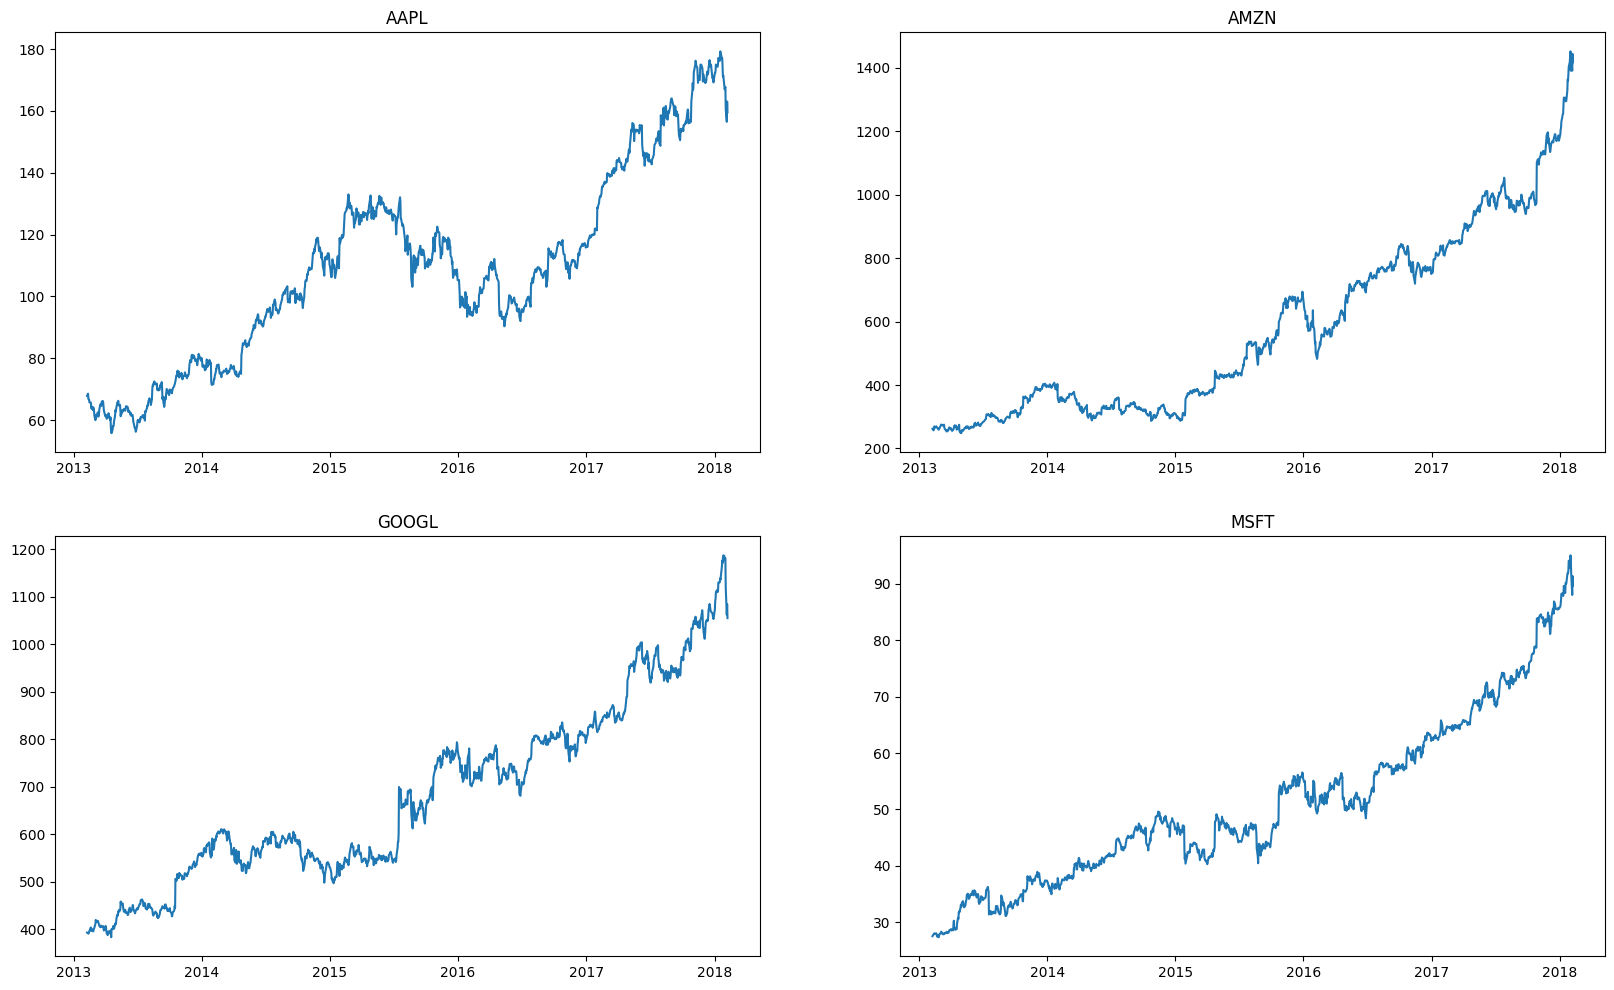

In [12]:
# ============== 4. Exploratory Data Analysis (EDA) ==============
# Plot closing prices over time for each stock
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = df[df["Name"] == stock]
    plt.plot(stock_data["date"], stock_data["close"])
    plt.title(f"{stock}")

In [13]:
# Define the non-linear function to fit
def exponential(x, a, b, c):
    """
    An exponential function: y = a * exp(b * x) + c
    a: amplitude
    b: growth constant
    c: offset
    """
    return a * np.exp(b * x) + c

def quadratic(x, a, b, c):
    """
    A quadratic function: y = ax^2 + bx + c
    a: quadratic coefficient
    b: linear coefficient
    c: constant term
    """
    return a * x**2 + b * x + c

In [ ]:
# Create a new column "years" representing the number of years since the earliest date in the dataset
# This will be used as the independent variable for curve fitting and prevents numerical issues with large date values
df["years"] = (df["date"] - df["date"].min()).dt.days / 365
df["years"]

0       0.000000
1       0.008219
2       0.010959
3       0.013699
4       0.016438
          ...   
5031    4.983562
5032    4.986301
5033    4.994521
5034    4.997260
5035    5.000000
Name: years, Length: 5036, dtype: float64

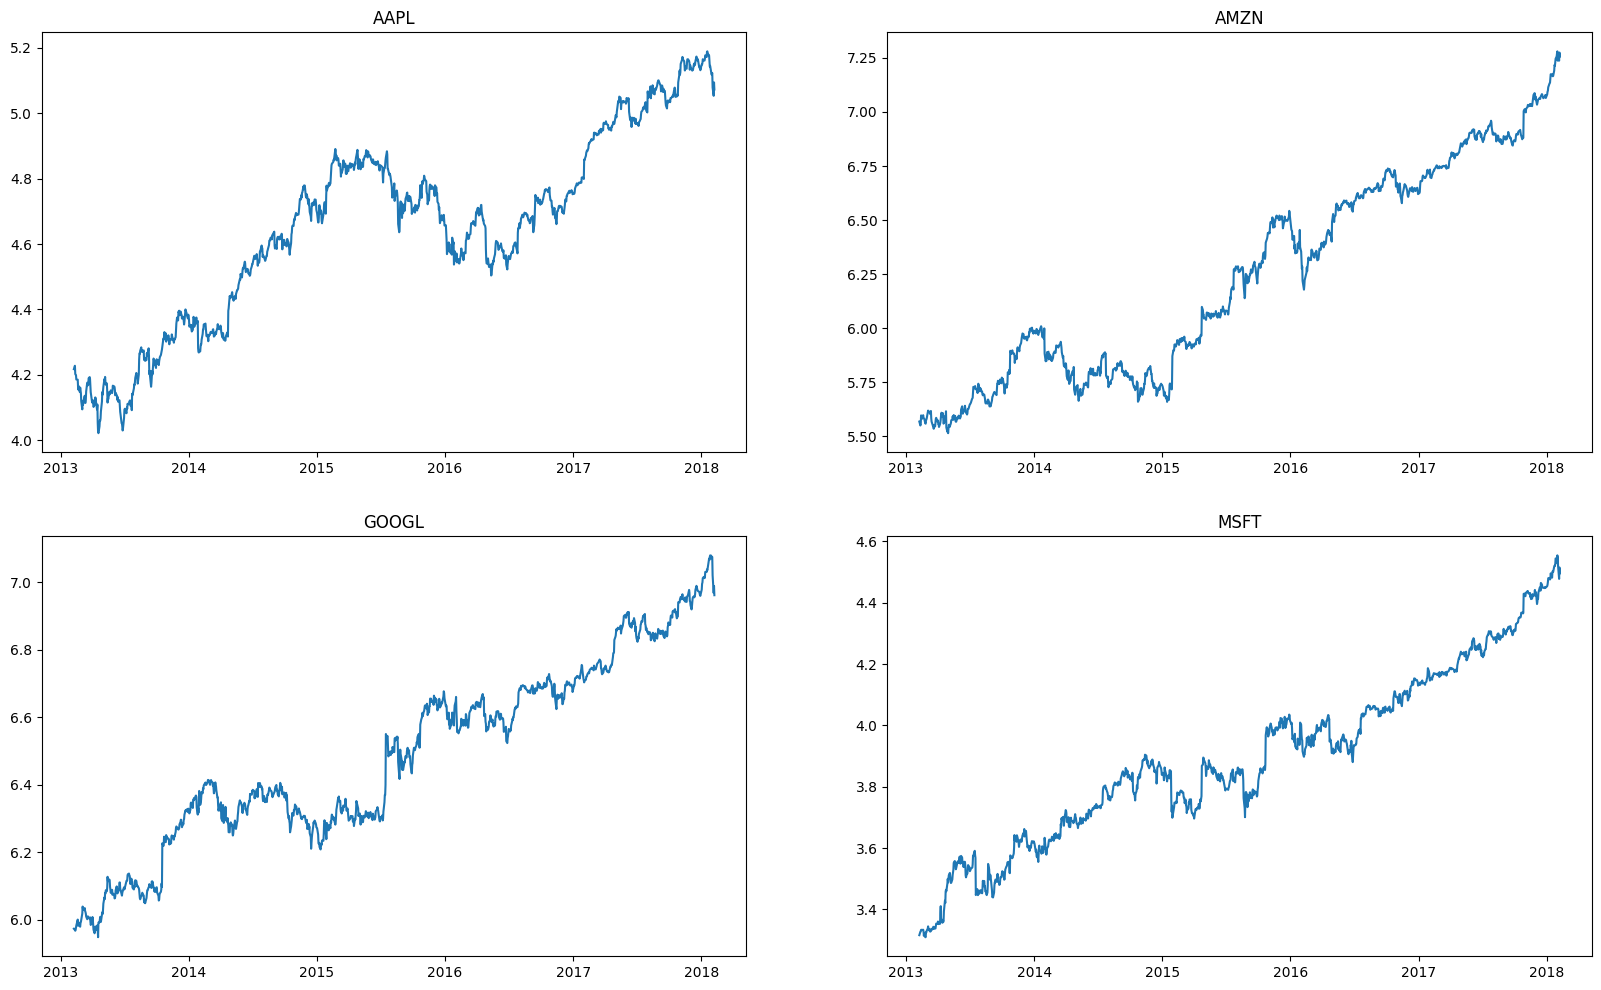

In [29]:
# Plot logarithmic scale plots for closing prices over time
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = df[df["Name"] == stock]
    plt.plot(stock_data["date"], np.log(stock_data["close"]))
    plt.title(f"{stock}")

[0.17778498] 4.206939508427082
AAPL fit parameters: a = 67.1507, b = 0.1778
[0.31968781] 5.442650001809955
AMZN fit parameters: a = 231.0537, b = 0.3197
[0.18195432] 6.033352221648347
GOOGL fit parameters: a = 417.1109, b = 0.1820
[0.19036112] 3.416784836839801
MSFT fit parameters: a = 30.4713, b = 0.1904


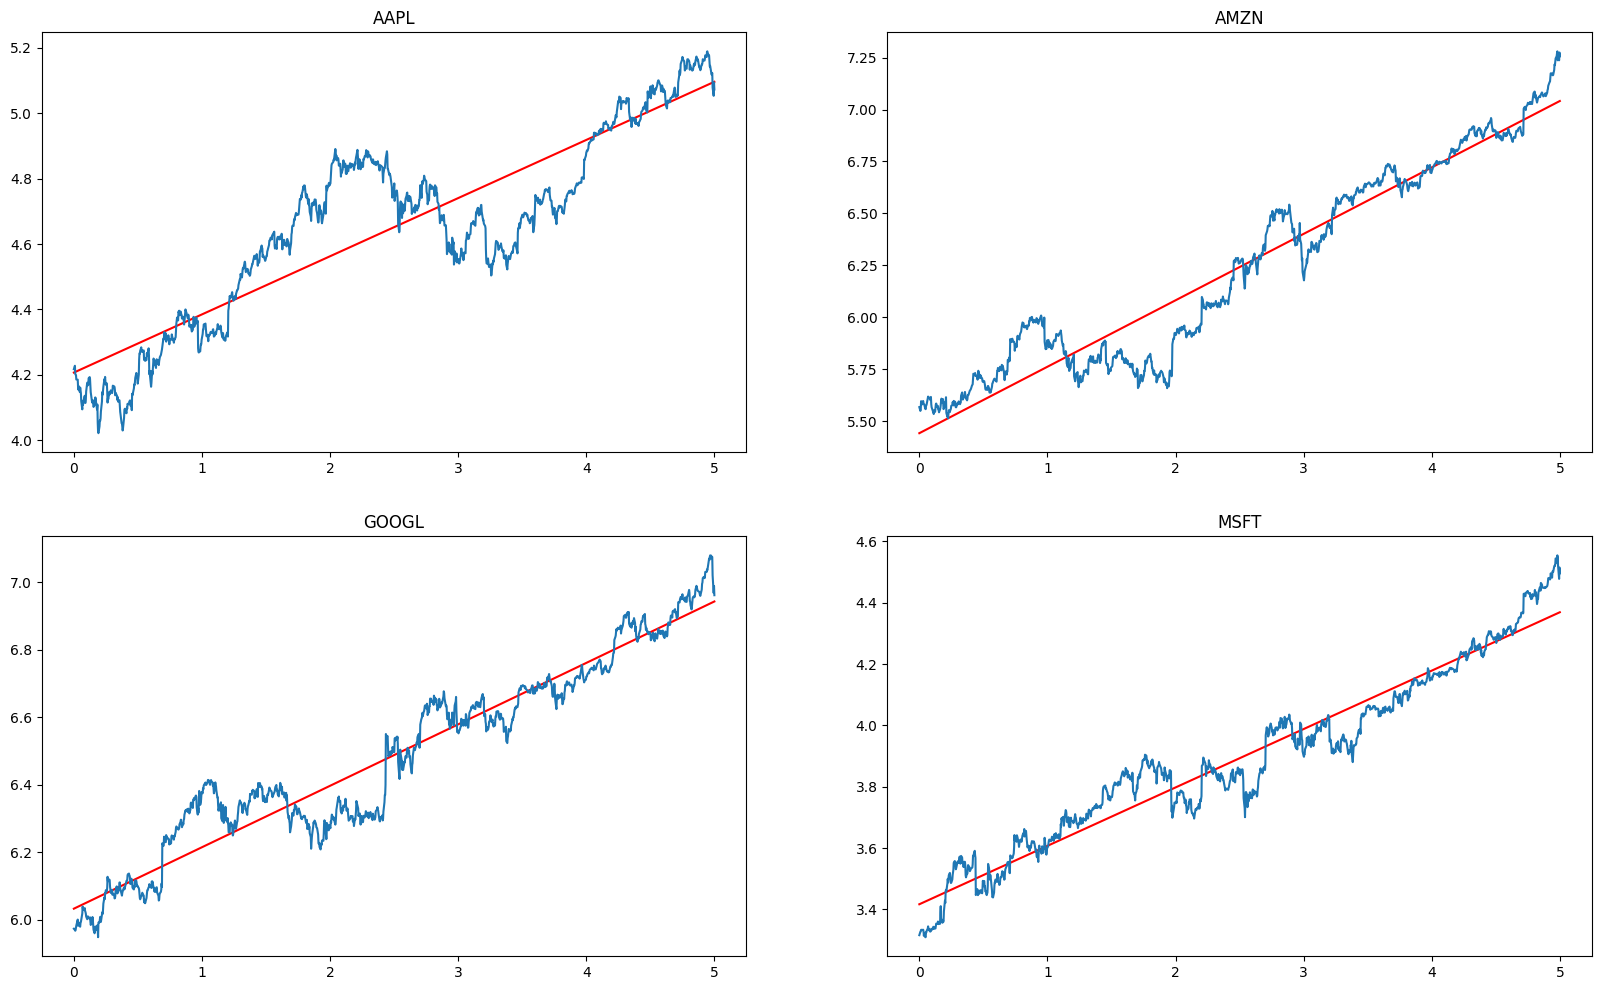

In [ ]:
from sklearn.linear_model import LinearRegression

# Plot logarithmic scale linear regression plots for closing prices over time
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = df[df["Name"] == stock]
    X = np.array(stock_data["years"])
    y = np.array(stock_data["close"])
    log_y = np.log(y)
    
    # Fit linear regression in log-log space
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), log_y)
    
    print(model.coef_, model.intercept_)
    
    slope = model.coef_[0]        # b
    intercept = model.intercept_  # ln(a)

    a = np.exp(intercept)
    b = slope
    
    plt.plot(X, model.predict(X.reshape(-1, 1)), color="red", label="Fit")
    plt.plot(stock_data["years"], np.log(stock_data["close"]))
    plt.title(f"{stock}")
    
    print(f"{stock} fit parameters: a = {a:.4f}, b = {b:.4f}")

AAPL fit parameters: a = 118.2193, b = 0.1166, c = -51.4192
AMZN fit parameters: a = 111.7615, b = 0.4592, c = 142.0475
GOOGL fit parameters: a = 160.6795, b = 0.3222, c = 282.6144
MSFT fit parameters: a = 6.6598, b = 0.4357, c = 27.1236


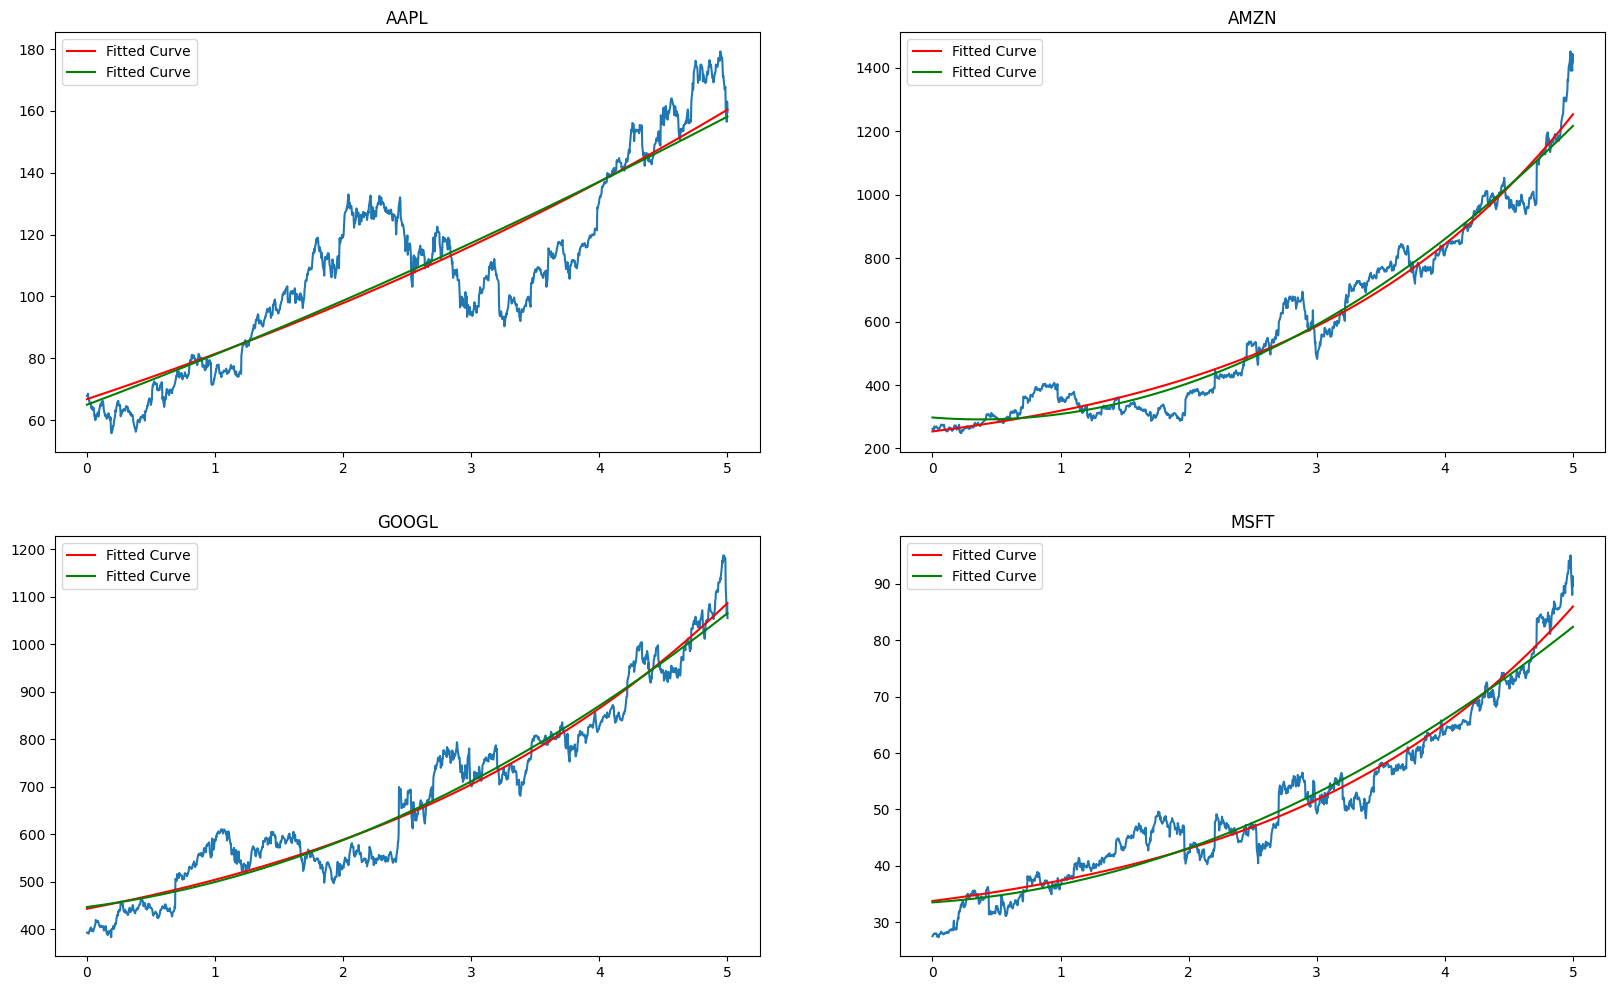

In [ ]:
from scipy.optimize import curve_fit

# Plot regression plots for closing prices over time
plt.figure(figsize=(20, 12))

initial_guesses = [1, 0.1, 0]

for index, stock in enumerate(stock_tickers, 1):
    
    stock_df = df[df["Name"] == stock]
    stock_df = stock_df.set_index("years")
    stock_df = stock_df["close"]

    # Perform the exponential regression using curve_fit
    popt, pcov = curve_fit(exponential, stock_df.index, stock_df.values, p0=initial_guesses)
    a_fit, b_fit, c_fit = popt
    y_fitted = exponential(stock_df.index, a_fit, b_fit, c_fit)
    
    # Perform the quadratic regression using curve_fit
    quad_popt, quad_pcov = curve_fit(quadratic, stock_df.index, stock_df.values, p0=initial_guesses)
    quad_a_fit, quad_b_fit, quad_c_fit = quad_popt
    quad_y_fitted = quadratic(stock_df.index, quad_a_fit, quad_b_fit, quad_c_fit)
    
    plt.subplot(2, 2, index)
    plt.plot(stock_df.index, stock_df.values)
    plt.plot(stock_df.index, y_fitted, label='Fitted Curve', color='red')
    plt.plot(stock_df.index, quad_y_fitted, label='Fitted Curve', color='green')
    plt.legend()
    plt.title(f"{stock}")
    
    print(f"{stock} fit parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")

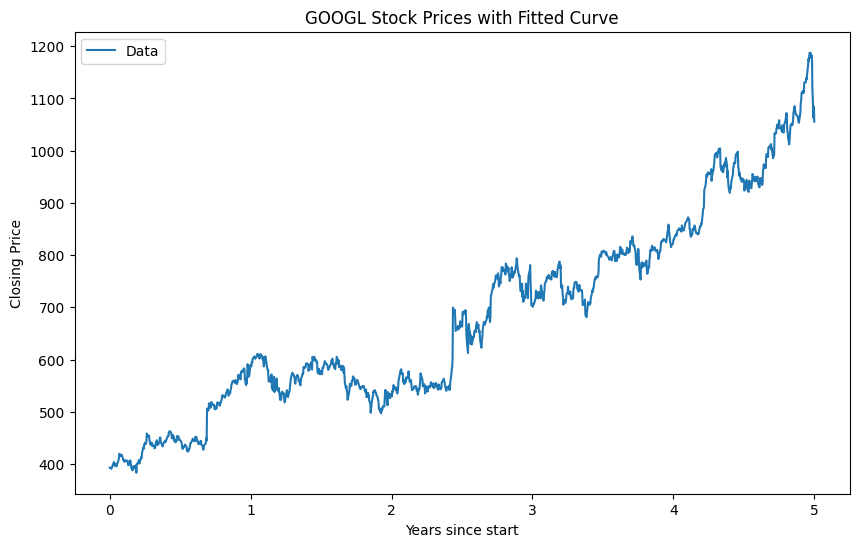

In [ ]:
# Plot regression plots for closing prices over time
google_df = df[df["Name"] == "GOOGL"]

plt.figure(figsize=(10, 6))
plt.plot(google_df["years"], google_df["close"], label='Data')
plt.title("GOOGL Stock Prices with Fitted Curve")
plt.xlabel("Years since start")
plt.ylabel("Closing Price")
plt.show()

In [ ]:
small_google_df = google_df.set_index("years")
small_google_df = small_google_df["close"]
small_google_df

<class 'pandas.core.series.Series'>


day_index
0.000000     393.0777
0.008219     391.6012
0.010959     390.7403
0.013699     391.8214
0.016438     394.3039
              ...    
4.983562    1181.5900
4.986301    1119.2000
4.994521    1062.3900
4.997260    1084.4300
5.000000    1055.4100
Name: close, Length: 1259, dtype: float64

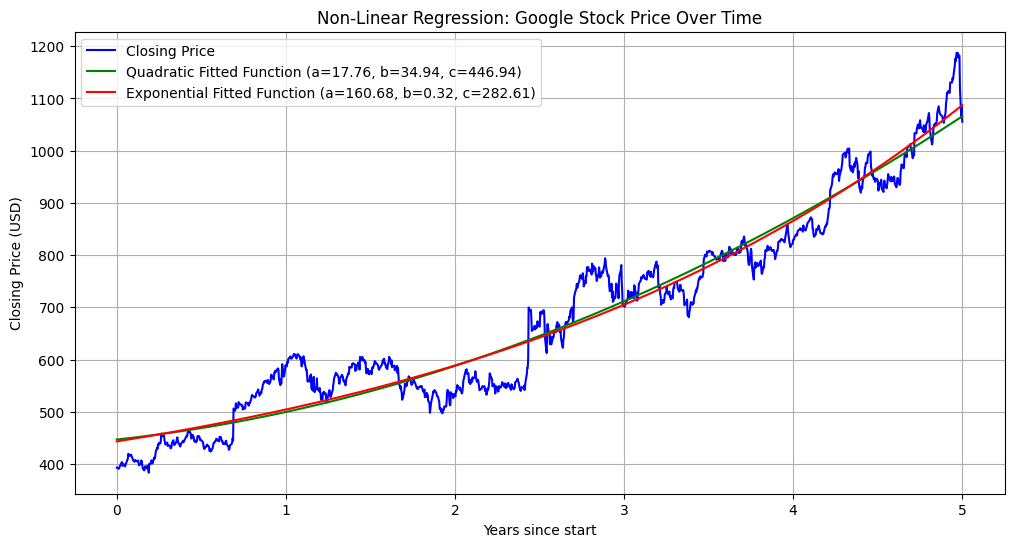

In [55]:
# Perform the non-linear regression using curve_fit
# Provide initial guess values for the parameters
initial_guesses = [1, 0.1, 0]
quad_params, quad_covariance = curve_fit(quadratic, small_google_df.index, small_google_df.values, p0=initial_guesses)

# Extract the fitted parameters
quad_a_fit, quad_b_fit, quad_c_fit = quad_params

# 4. Generate the fitted curve
quad_y_fit = quadratic(small_google_df.index, quad_a_fit, quad_b_fit, quad_c_fit)


# Perform the non-linear regression using curve_fit
params, covariance = curve_fit(exponential, small_google_df.index, small_google_df.values, p0=initial_guesses)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# 4. Generate the fitted curve
y_fit = exponential(small_google_df.index, a_fit, b_fit, c_fit)


# 5. Visualise the results
plt.figure(figsize=(12, 6))
plt.plot(small_google_df.index, small_google_df.values, label="Closing Price", color="blue")
plt.plot(small_google_df.index, quad_y_fit, label=f'Quadratic Fitted Function (a={quad_a_fit:.2f}, b={quad_b_fit:.2f}, c={quad_c_fit:.2f})', color='green')
plt.plot(small_google_df.index, y_fit, label=f'Exponential Fitted Function (a={a_fit:.2f}, b={b_fit:.2f}, c={c_fit:.2f})', color='red')
plt.xlabel("Years since start")
plt.ylabel("Closing Price (USD)")
plt.title("Non-Linear Regression: Google Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Calculate 10 day rolling mean of closing prices
df["close"].rolling(window=10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
5031    92.765
5032    92.943
5033    92.582
5034    92.525
5035    92.304
Name: close, Length: 5036, dtype: float64

In [14]:
# Create a moving average dataframe and add 10, 20 and 50 day moving average windows for each stock
moving_avg_df = df.copy()

moving_avg_windows = [10, 20, 50]

for window in moving_avg_windows:
    moving_avg_df[f"close_{window}"] = moving_avg_df.groupby("Name")["close"].transform(lambda x: x.rolling(window).mean())

In [15]:
# Preview moving average dataframe
moving_avg_df[moving_avg_df["Name"] == "AAPL"]["close_10"].head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
Name: close_10, dtype: float64

In [16]:
# Preview moving average for GOOGL
moving_avg_df[moving_avg_df["Name"] == "GOOGL"]["close_10"].head(15)

2518          NaN
2519          NaN
2520          NaN
2521          NaN
2522          NaN
2523          NaN
2524          NaN
2525          NaN
2526          NaN
2527    395.72582
2528    395.99609
2529    396.38198
2530    397.33694
2531    398.25486
2532    399.17428
Name: close_10, dtype: float64

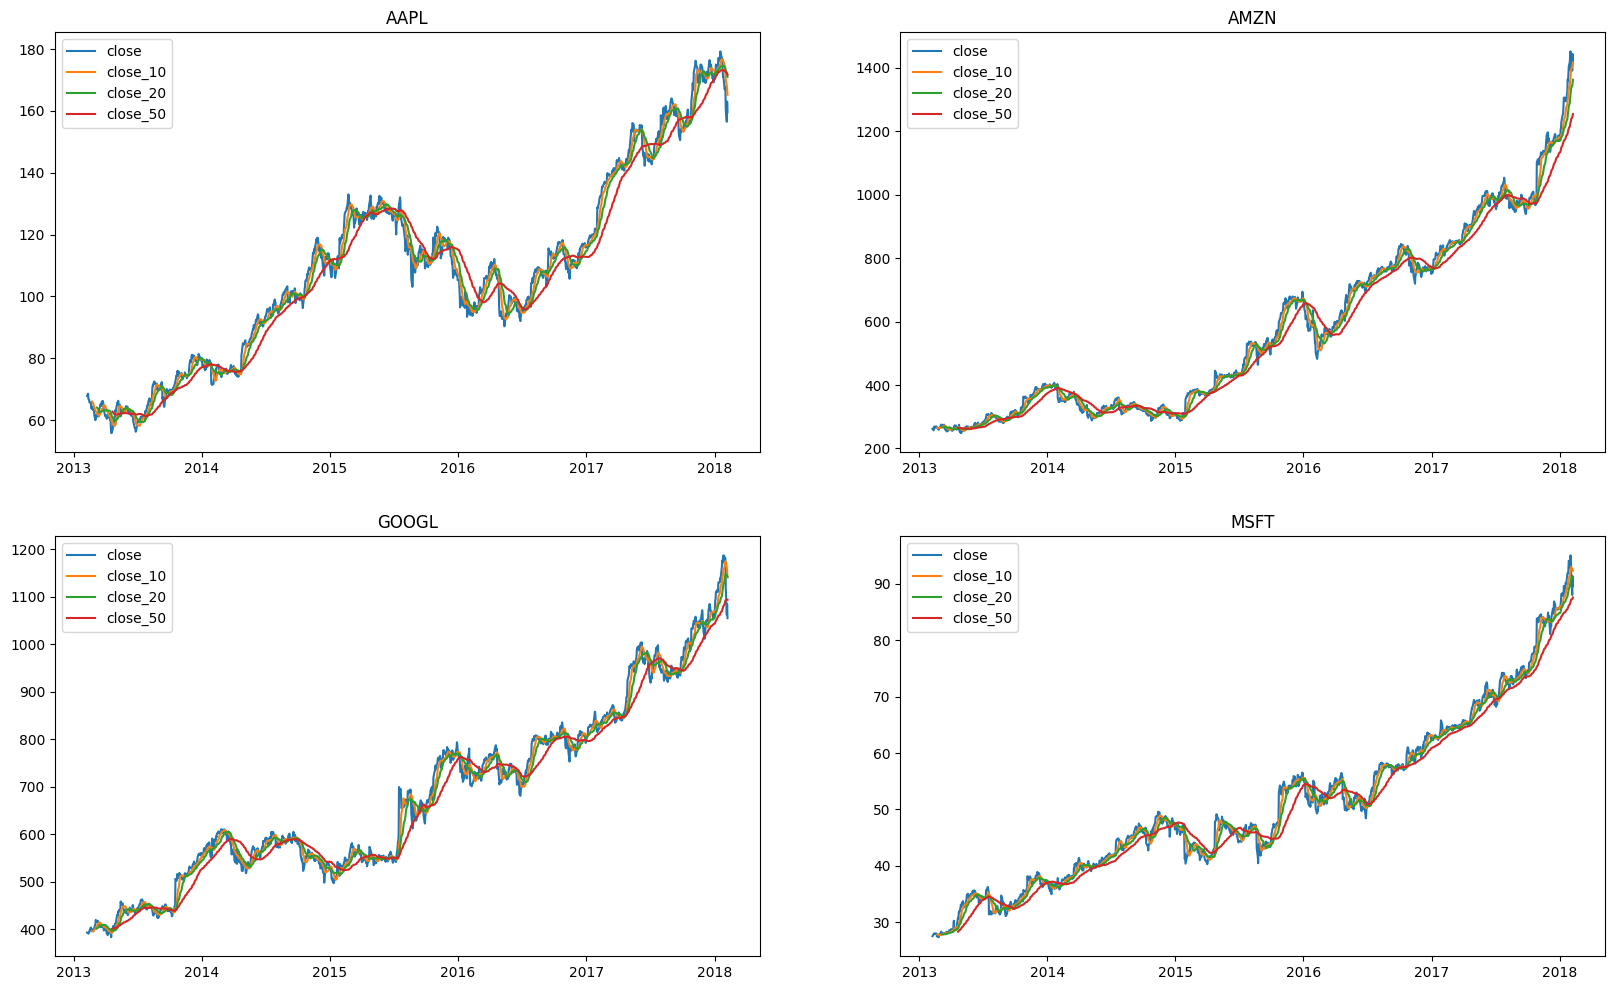

In [17]:
# Plot moving averages along with closing prices for each stock
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = moving_avg_df[moving_avg_df["Name"] == stock]
    # moving_avg_df[["close_10", "close_20", "close_50"]].plot(ax=plt.gca())
    plt.plot(stock_data["date"], stock_data["close"], label="close")
    plt.plot(stock_data["date"], stock_data["close_10"], label="close_10")
    plt.plot(stock_data["date"], stock_data["close_20"], label="close_20")
    plt.plot(stock_data["date"], stock_data["close_50"], label="close_50")
    plt.legend()
    plt.title(f"{stock}")

In [18]:
# Create a separate dataframe for Apple stock
apple_df = df[df["Name"] == "AAPL"].copy()

apple_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
# Add a new column calculating daily percentage change in closing prices
apple_df["change"] = apple_df["close"].pct_change() * 100

In [20]:
import plotly.express as px

# Plot daily percentage change for Apple stock
px.line(apple_df, x="date", y="change", title="Apple Daily Percentage Change", labels={"change": "Daily % Change", "date": "Date"})

In [21]:
apple_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
change           float64
dtype: object

In [22]:
# Set index to date 
apple_df.set_index("date", inplace=True)

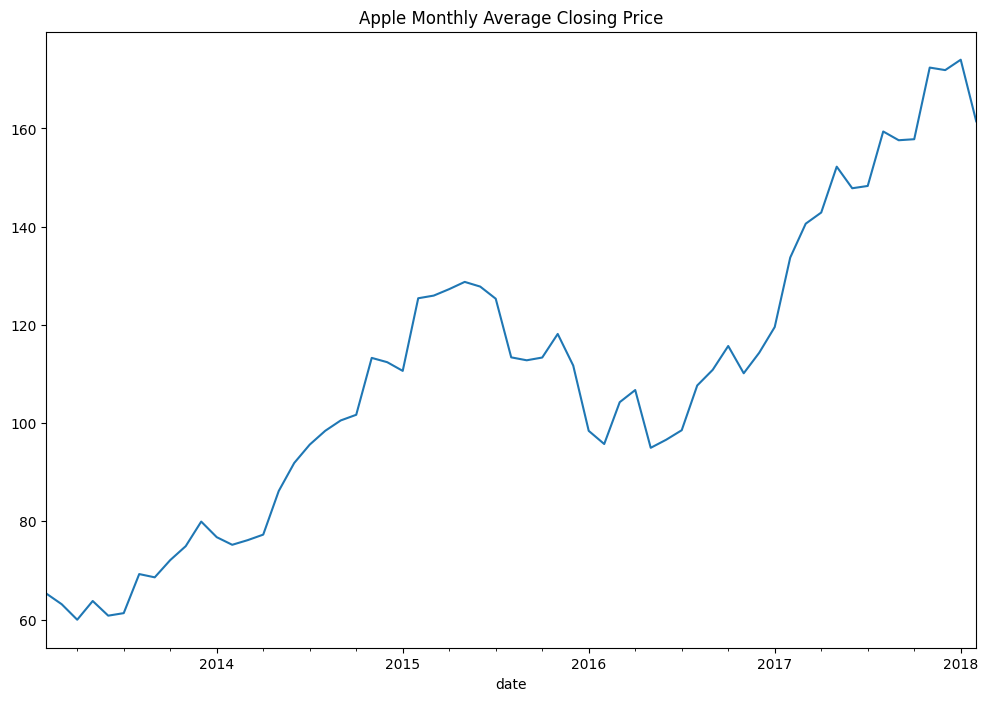

In [23]:
# Resample the data to monthly frequency and plot the average closing price
apple_df.resample("M")["close"].mean().plot(title="Apple Monthly Average Closing Price", figsize=(12, 8))
plt.show()

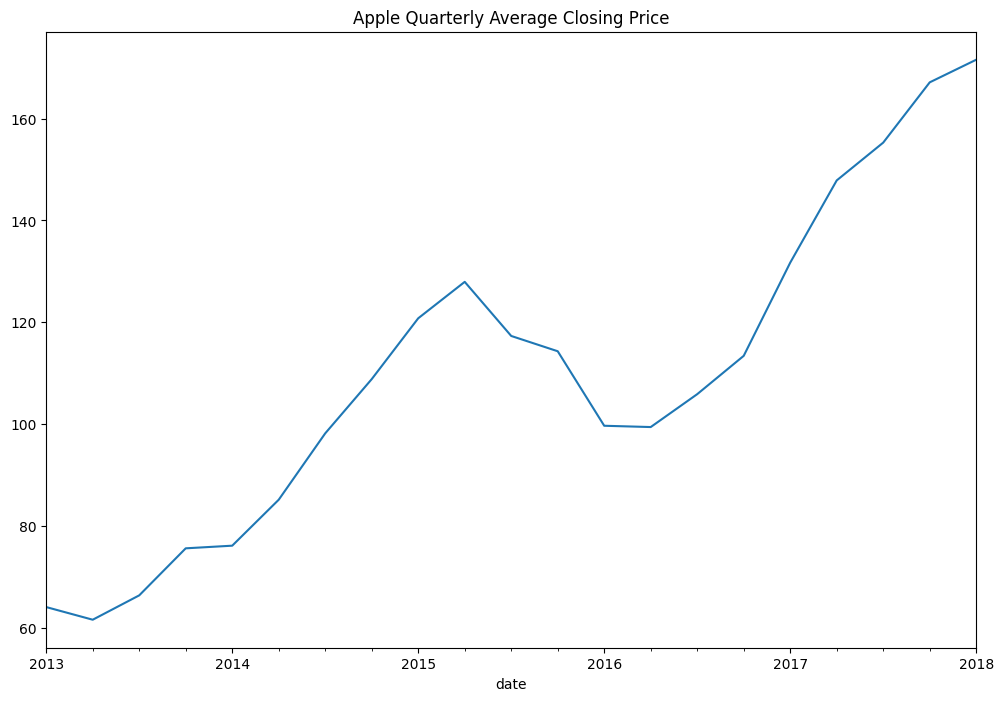

In [24]:
# Resample the data to quarterly frequency and plot the average closing price
apple_df.resample("Q")["close"].mean().plot(title="Apple Quarterly Average Closing Price", figsize=(12, 8))
plt.show()

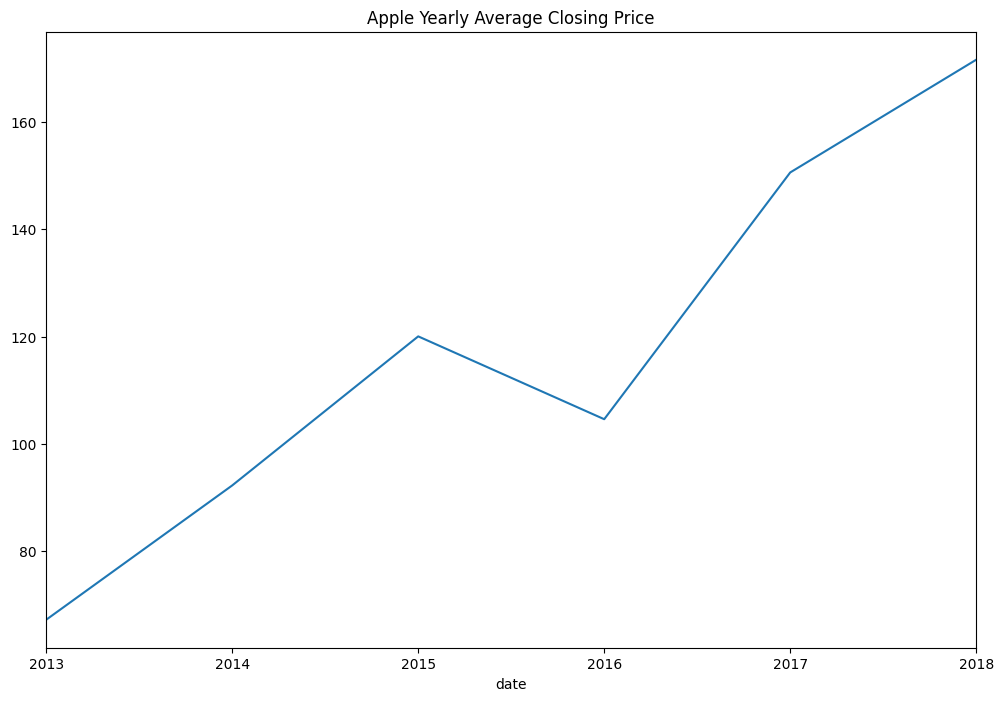

In [25]:
# Resample the data to yearly frequency and plot the average closing price
apple_df.resample("Y")["close"].mean().plot(title="Apple Yearly Average Closing Price", figsize=(12, 8))
plt.show()

In [26]:
# Create new dataframe with closing prices of all stocks
close_df = pd.DataFrame()

for stock in stock_tickers:
    stock_data = df[df["Name"] == stock][["date", "close"]].copy()
    stock_data.set_index("date", inplace=True)
    close_df[stock] = stock_data["close"]

In [27]:
# Preview dataframe
close_df.head()

,AAPL,AMZN,GOOGL,MSFT
date,,,,
2013-02-08,67.8542,261.95,393.0777,27.55
2013-02-11,68.5614,257.21,391.6012,27.86
2013-02-12,66.8428,258.70,390.7403,27.88
2013-02-13,66.7156,269.47,391.8214,28.03
2013-02-14,66.6556,269.24,394.3039,28.04


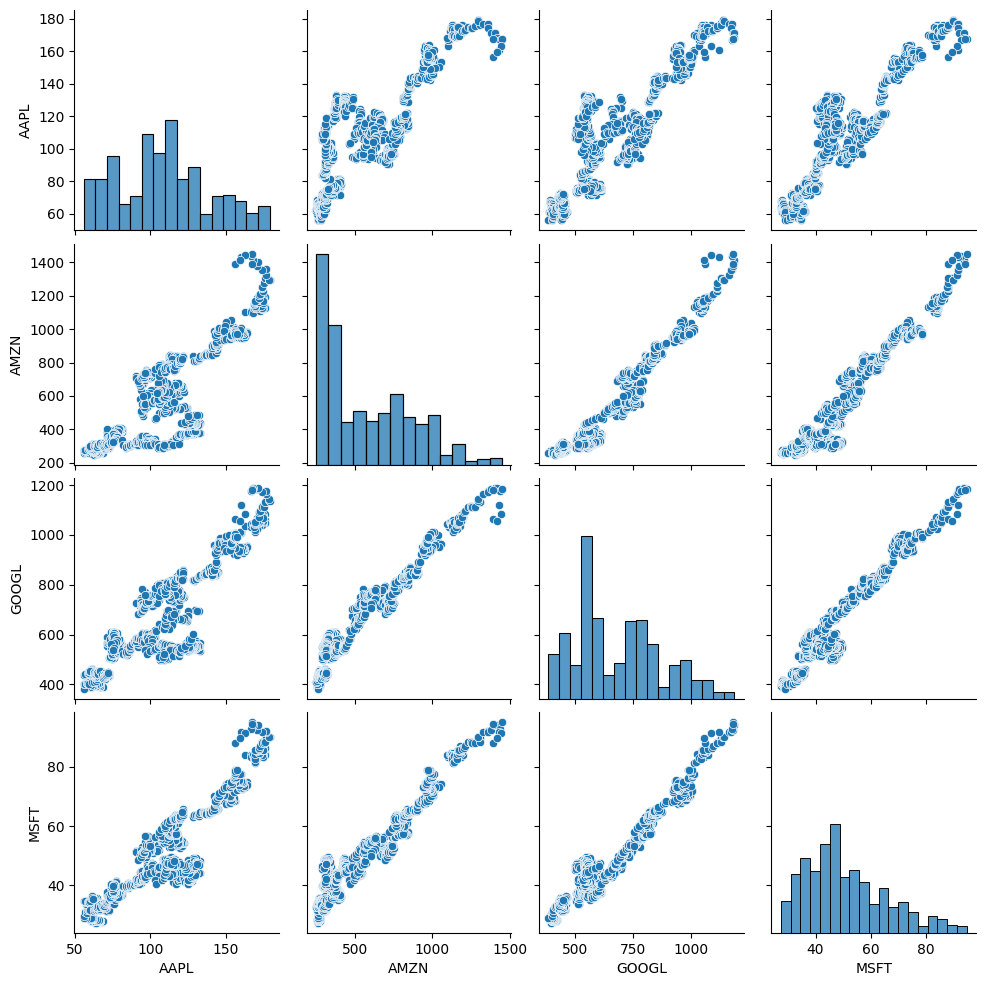

In [28]:
# Create pairplot to visualize relationships between closing prices of different stocks
sns.pairplot(close_df)
plt.show()

In [29]:
# Calculate correlation matrix of closing prices
close_df.corr()

,AAPL,AMZN,GOOGL,MSFT
AAPL,1.000000,0.819078,0.843736,0.899689
AMZN,0.819078,1.000000,0.973988,0.955977
GOOGL,0.843736,0.973988,1.000000,0.970779
MSFT,0.899689,0.955977,0.970779,1.000000


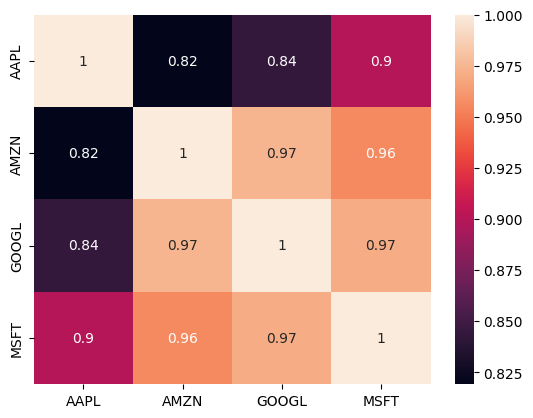

In [30]:
# Produce a heatmap to visualise the correlation matrix
sns.heatmap(close_df.corr(), annot=True)
plt.show()

In [31]:
close_df

,AAPL,AMZN,GOOGL,MSFT
date,,,,
2013-02-08,67.8542,261.95,393.0777,27.55
2013-02-11,68.5614,257.21,391.6012,27.86
2013-02-12,66.8428,258.70,390.7403,27.88
2013-02-13,66.7156,269.47,391.8214,28.03
2013-02-14,66.6556,269.24,394.3039,28.04
...,...,...,...,...
2018-02-01,167.7800,1390.00,1181.5900,94.26
2018-02-02,160.5000,1429.95,1119.2000,91.78
2018-02-05,156.4900,1390.00,1062.3900,88.00


In [32]:
# Calculate daily percentage change for Apple stock using the close_df dataframe
(close_df["AAPL"] - close_df["AAPL"].shift(1)) / close_df["AAPL"].shift(1) * 100

date
2013-02-08         NaN
2013-02-11    1.042235
2013-02-12   -2.506658
2013-02-13   -0.190297
2013-02-14   -0.089934
                ...   
2018-02-01    0.209043
2018-02-02   -4.339015
2018-02-05   -2.498442
2018-02-06    4.179181
2018-02-07   -2.140710
Name: AAPL, Length: 1259, dtype: float64

In [33]:
# Calculate daily percentage change for all stocks and add as new columns to close_df
for column in close_df.columns:
    close_df[f"{column}_pct_change"] = (close_df[column] - close_df[column].shift(1)) / close_df[column].shift(1) * 100

In [34]:
# Preview dataframe
close_df["AAPL_pct_change"]

date
2013-02-08         NaN
2013-02-11    1.042235
2013-02-12   -2.506658
2013-02-13   -0.190297
2013-02-14   -0.089934
                ...   
2018-02-01    0.209043
2018-02-02   -4.339015
2018-02-05   -2.498442
2018-02-06    4.179181
2018-02-07   -2.140710
Name: AAPL_pct_change, Length: 1259, dtype: float64

In [35]:
# Compare to pandas built-in pct_change function
apple_df["change"]

date
2013-02-08         NaN
2013-02-11    1.042235
2013-02-12   -2.506658
2013-02-13   -0.190297
2013-02-14   -0.089934
                ...   
2018-02-01    0.209043
2018-02-02   -4.339015
2018-02-05   -2.498442
2018-02-06    4.179181
2018-02-07   -2.140710
Name: change, Length: 1259, dtype: float64

In [36]:
# Created percentage change dataframe
change_df = close_df[[f"{stock}_pct_change" for stock in stock_tickers]].copy()
change_df

,AAPL_pct_change,AMZN_pct_change,GOOGL_pct_change,MSFT_pct_change
date,,,,
2013-02-08,NaN,NaN,NaN,NaN
2013-02-11,1.042235,-1.809506,-0.375625,1.125227
2013-02-12,-2.506658,0.579293,-0.219841,0.071788
2013-02-13,-0.190297,4.163123,0.276680,0.538020
2013-02-14,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...
2018-02-01,0.209043,-4.196734,-0.053290,-0.789391
2018-02-02,-4.339015,2.874101,-5.280173,-2.631021
2018-02-05,-2.498442,-2.793804,-5.075947,-4.118544


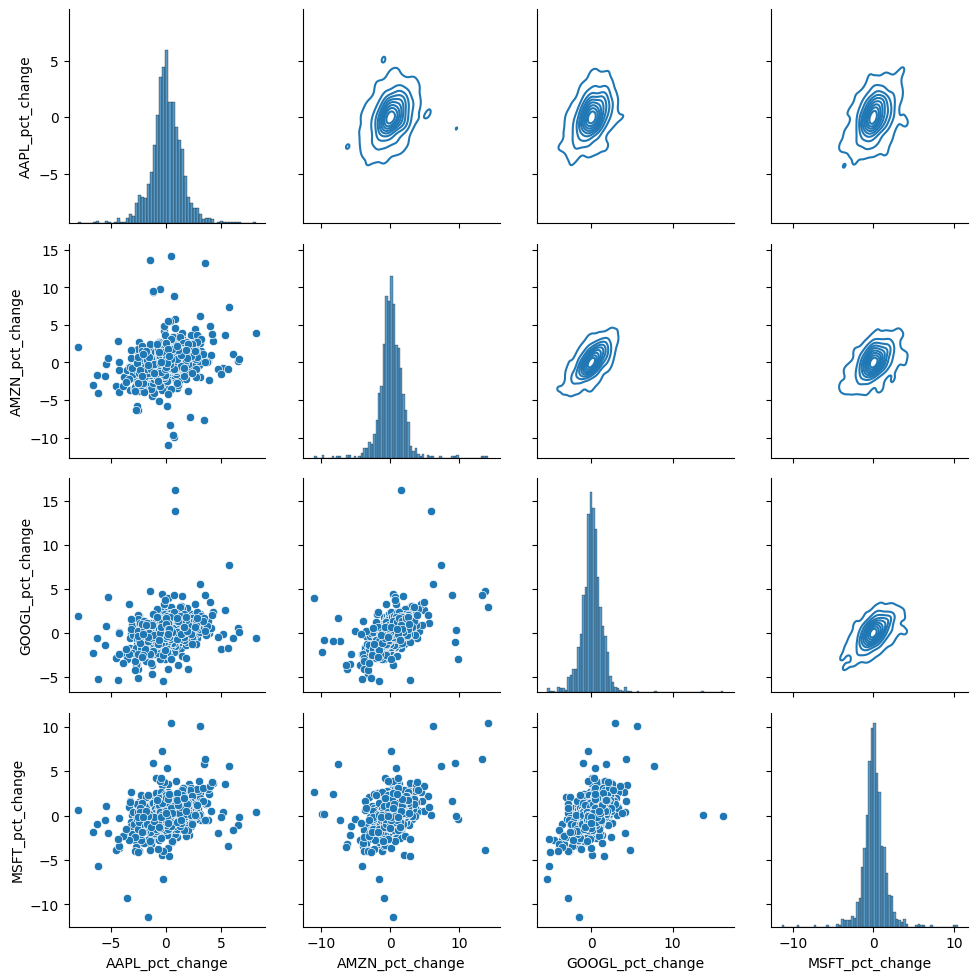

In [37]:
# Plot pairgrid to visualise relationships between daily percentage changes of different stocks
grid = sns.PairGrid(change_df)
grid.map_diag(sns.histplot)
grid.map_lower(sns.scatterplot)
grid.map_upper(sns.kdeplot)
plt.show()

In [38]:
# Calculate correlation matrix of daily percentage changes
change_df.corr()

,AAPL_pct_change,AMZN_pct_change,GOOGL_pct_change,MSFT_pct_change
AAPL_pct_change,1.000000,0.287659,0.348858,0.366598
AMZN_pct_change,0.287659,1.000000,0.548423,0.402678
GOOGL_pct_change,0.348858,0.548423,1.000000,0.488373
MSFT_pct_change,0.366598,0.402678,0.488373,1.000000


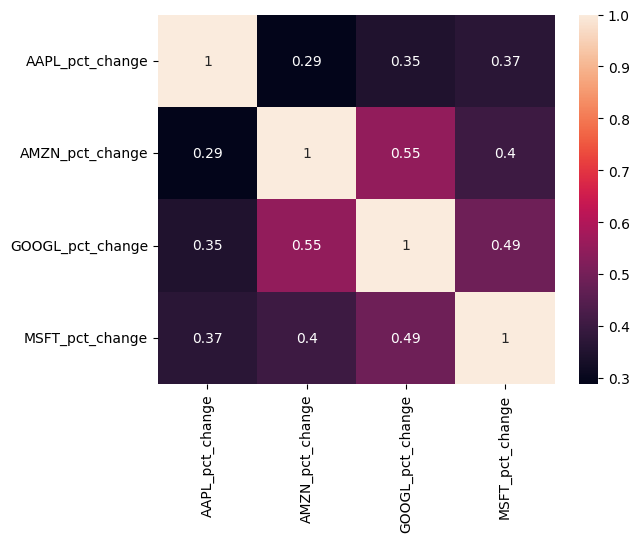

In [39]:
# Plot heatmap to visualise the correlation matrix
sns.heatmap(change_df.corr(), annot=True)
plt.show()